In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

import vae.model
import data
import utils
import optimizer
import evaluater
from functools import partialmethod

from tqdm import tqdm
tqdm.__init__ = partialmethod(tqdm.__init__, disable=True)

np.random.seed(123)
%load_ext autoreload
%autoreload 2

# MNIST

In [ ]:
n_samples = 1024
batch_size = 1024
restarts = 5

device = torch.device('cuda')
dataloader, imsize = data.load(name='MNIST', path='./data', batch_size=batch_size)
dec = vae.model.Decoder()
dec.load_state_dict(torch.load("./out/models/vae_dec_mnist.sd"))
dec = nn.DataParallel(dec, device_ids=[0])

In [ ]:
config = {'arch': 'vae',
          'device': device,
          'meas_fn': utils.torch_magnitudes,
          'dist_fn': lambda X, Y: torch.mean((X - Y)**2 , dim=(1,2,3)),
          'start_layer': 0, 'end_layer': 2,
          'latent_size': (100,),
          'lr': [0.1, 0.1, 0.1], 'lr_rampdown': 0., 'lr_rampup': 0., 'lr_global': False,
          'im_steps': [],
          'random_init': 5000,
          }
file = "./out/reconstructions/vae/MNIST_mii"
latent, noise = None, None

batch, out, latent, noise = optimizer.run(dec, config, dataloader['test'], imsize, n_samples=n_samples, bs=batch_size, restarts=restarts, z_init=latent, noise_init=noise, file=file)

new_out = utils.pick_results(batch, out)
for i in range(new_out.shape[1]):
    print("PSNR: {:.4f} +/- {:.4f}\nSSIM: {:.4f} +/- {:.4f}\nLPIPS: {:.4f} +/- {:.4f}\n".format(
        *evaluater.benchmark(batch, new_out[:,i], measure='psnr', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='ssim', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='lpips', reg=True)
    ))
utils.plot_grid(np.vstack([batch[:16], new_out[:16, -1]]), figsize=(8,8))

In [ ]:
config = {'arch': 'vae',
          'device': device,
          'meas_fn': utils.torch_magnitudes,
          'dist_fn': lambda X, Y: torch.mean((X - Y)**2 , dim=(1,2,3)),
          'start_layer': 0, 'end_layer': 2,
          'latent_size': (100,),
          'lr': [0.1, 0.1, 0.1], 'lr_rampdown': 0., 'lr_rampup': 0., 'lr_global': False,
          'im_steps': [(3000,0,1)],
          'mahalanobis': False,
          'pgd': False,
          'keep_im' : True,
          'random_init': 1,
          'negate': True,
          }
file = "./out/reconstructions/vae/MNIST_dpr"
latent, noise = None, None

batch, out, latent, noise = optimizer.run(dec, config, dataloader['test'], imsize, n_samples=n_samples, bs=batch_size, restarts=restarts, z_init=latent, noise_init=noise, file=file)

new_out = utils.pick_results(batch, out)
for i in range(new_out.shape[1]):
    print("PSNR: {:.4f} +/- {:.4f}\nSSIM: {:.4f} +/- {:.4f}\nLPIPS: {:.4f} +/- {:.4f}\n".format(
        *evaluater.benchmark(batch, new_out[:,i], measure='psnr', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='ssim', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='lpips', reg=True)
    ))
utils.plot_grid(np.vstack([batch[:16], new_out[:16, -1]]), figsize=(8,8))

PSNR: 19.4919 +/- 0.3957
SSIM: 0.7673 +/- 0.0125
LPIPS: 0.1502 +/- 0.0065

PSNR: 21.6202 +/- 0.3807
SSIM: 0.8397 +/- 0.0103
LPIPS: 0.1115 +/- 0.0054

PSNR: 22.7632 +/- 0.3704
SSIM: 0.8703 +/- 0.0093
LPIPS: 0.0948 +/- 0.0049

PSNR: 23.6235 +/- 0.3514
SSIM: 0.8936 +/- 0.0080
LPIPS: 0.0818 +/- 0.0041



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


PSNR: 24.2118 +/- 0.3407
SSIM: 0.9070 +/- 0.0071
LPIPS: 0.0749 +/- 0.0037



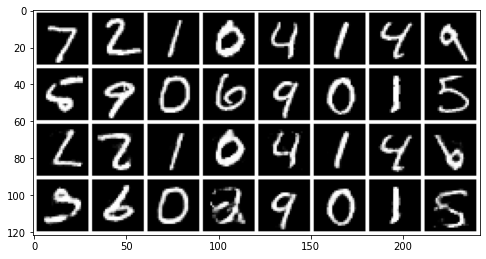

In [3]:
batch, out, latent, noise = utils.load_results("./out/reconstructions/vae/MNIST_dpr")
new_out = utils.pick_results(batch, out)
for i in range(new_out.shape[1]):
    print("PSNR: {:.4f} +/- {:.4f}\nSSIM: {:.4f} +/- {:.4f}\nLPIPS: {:.4f} +/- {:.4f}\n".format(
        *evaluater.benchmark(batch, new_out[:,i], measure='psnr', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='ssim', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='lpips', reg=True)
    ))
utils.plot_grid(np.vstack([batch[:16], new_out[:16, -1]]), figsize=(8,8))

In [ ]:
config = {'arch': 'vae',
          'device': device,
          'meas_fn': utils.torch_magnitudes,
          'dist_fn': lambda X, Y: torch.mean((X - Y)**2 , dim=(1,2,3)),
          'start_layer': 0, 'end_layer': 2,
          'latent_size': (100,),
          'lr': [0.1, 0.1, 0.1], 'lr_rampdown': 0., 'lr_rampup': 0., 'lr_global': False,
          'im_steps': [(3000,0,1)],
          'mahalanobis': False,
          'pgd': False,
          'keep_im' : True,
          'random_init': 0,
          }
file = "./out/reconstructions/vae/MNIST_dpr-mii"
_, _, latent, noise = utils.load_results("./out/reconstructions/vae/MNIST_mii")

batch, out, latent, noise = optimizer.run(dec, config, dataloader['test'], imsize, n_samples=n_samples, bs=batch_size, restarts=restarts, z_init=latent, noise_init=noise, file=file)

new_out = utils.pick_results(batch, out)
for i in range(new_out.shape[1]):
    print("PSNR: {:.4f} +/- {:.4f}\nSSIM: {:.4f} +/- {:.4f}\nLPIPS: {:.4f} +/- {:.4f}\n".format(
        *evaluater.benchmark(batch, new_out[:,i], measure='psnr', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='ssim', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='lpips', reg=True)
    ))
utils.plot_grid(np.vstack([batch[:16], new_out[:16, -1]]), figsize=(8,8))

PSNR: 23.9974 +/- 0.3295
SSIM: 0.9077 +/- 0.0069
LPIPS: 0.0730 +/- 0.0035

PSNR: 25.3468 +/- 0.3026
SSIM: 0.9339 +/- 0.0051
LPIPS: 0.0599 +/- 0.0026

PSNR: 25.9086 +/- 0.2874
SSIM: 0.9438 +/- 0.0043
LPIPS: 0.0547 +/- 0.0023

PSNR: 26.2642 +/- 0.2836
SSIM: 0.9482 +/- 0.0039
LPIPS: 0.0523 +/- 0.0021



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


PSNR: 26.4904 +/- 0.2807
SSIM: 0.9514 +/- 0.0036
LPIPS: 0.0510 +/- 0.0020



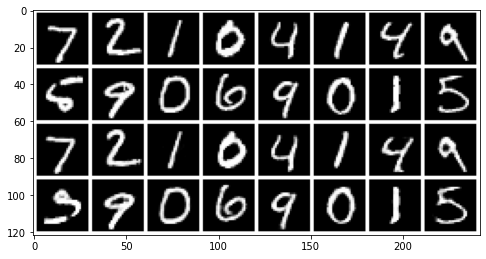

In [4]:
batch, out, latent, noise = utils.load_results("./out/reconstructions/vae/MNIST_dpr-mii")
new_out = utils.pick_results(batch, out)
for i in range(new_out.shape[1]):
    print("PSNR: {:.4f} +/- {:.4f}\nSSIM: {:.4f} +/- {:.4f}\nLPIPS: {:.4f} +/- {:.4f}\n".format(
        *evaluater.benchmark(batch, new_out[:,i], measure='psnr', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='ssim', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='lpips', reg=True)
    ))
utils.plot_grid(np.vstack([batch[:16], new_out[:16, -1]]), figsize=(8,8))

In [ ]:
config = {'arch': 'vae',
          'device': device,
          'meas_fn': utils.torch_magnitudes,
          'dist_fn': lambda X, Y: torch.mean((X - Y)**2 , dim=(1,2,3)),
          'start_layer': 0, 'end_layer': 2,
          'latent_size': (100,),
          'lr': [0.1, 0.1, 0.1], 'lr_rampdown': 0., 'lr_rampup': 0., 'lr_global': False,
          'im_steps': [(150,100,1), (150,50,1), (300,100,9)],
          'mahalanobis': False,
          'pgd': True,
          'keep_im' : True,
          'random_init': 1,
          'negate': True,
          }
file = "./out/reconstructions/vae/MNIST_prilo"
latent, noise = None, None

batch, out, latent, noise = optimizer.run(dec, config, dataloader['test'], imsize, n_samples=n_samples, bs=batch_size, restarts=restarts, z_init=latent, noise_init=noise, file=file)

new_out = utils.pick_results(batch, out)
for i in range(new_out.shape[1]):
    print("PSNR: {:.4f} +/- {:.4f}\nSSIM: {:.4f} +/- {:.4f}\nLPIPS: {:.4f} +/- {:.4f}\n".format(
        *evaluater.benchmark(batch, new_out[:,i], measure='psnr', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='ssim', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='lpips', reg=True)
    ))
utils.plot_grid(np.vstack([batch[:16], new_out[:16, -1]]), figsize=(8,8))

PSNR: 32.5622 +/- 0.8634
SSIM: 0.8703 +/- 0.0127
LPIPS: 0.0817 +/- 0.0075

PSNR: 37.8279 +/- 0.7414
SSIM: 0.9394 +/- 0.0091
LPIPS: 0.0402 +/- 0.0053

PSNR: 40.4130 +/- 0.6563
SSIM: 0.9657 +/- 0.0066
LPIPS: 0.0240 +/- 0.0039

PSNR: 41.6560 +/- 0.6105
SSIM: 0.9747 +/- 0.0057
LPIPS: 0.0181 +/- 0.0034



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


PSNR: 42.7584 +/- 0.5617
SSIM: 0.9843 +/- 0.0042
LPIPS: 0.0126 +/- 0.0025



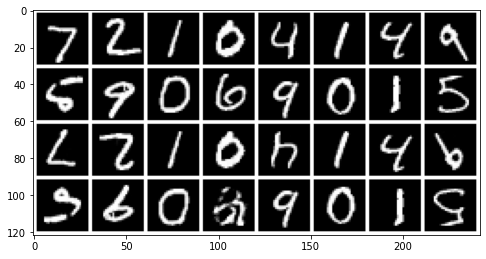

In [5]:
batch, out, latent, noise = utils.load_results("./out/reconstructions/vae/MNIST_prilo")
new_out = utils.pick_results(batch, out)
for i in range(new_out.shape[1]):
    print("PSNR: {:.4f} +/- {:.4f}\nSSIM: {:.4f} +/- {:.4f}\nLPIPS: {:.4f} +/- {:.4f}\n".format(
        *evaluater.benchmark(batch, new_out[:,i], measure='psnr', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='ssim', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='lpips', reg=True)
    ))
utils.plot_grid(np.vstack([batch[:16], new_out[:16, -1]]), figsize=(8,8))

In [ ]:
config = {'arch': 'vae',
          'device': device,
          'meas_fn': utils.torch_magnitudes,
          'dist_fn': lambda X, Y: torch.mean((X - Y)**2 , dim=(1,2,3)),
          'start_layer': 0, 'end_layer': 2,
          'latent_size': (100,),
          'lr': [0.1, 0.1, 0.1], 'lr_rampdown': 0., 'lr_rampup': 0., 'lr_global': False,
          'im_steps': [(150,100,1), (150,50,1), (300,100,9)],
          'mahalanobis': False,
          'pgd': True,
          'keep_im' : True,
          'random_init': 0,
          }
file = "./out/reconstructions/vae/MNIST_prilo-mii"
_, _, latent, noise = utils.load_results("./out/reconstructions/vae/MNIST_mii")

batch, out, latent, noise = optimizer.run(dec, config, dataloader['test'], imsize, n_samples=n_samples, bs=batch_size, restarts=restarts, z_init=latent, noise_init=noise, file=file)

new_out = utils.pick_results(batch, out)
for i in range(new_out.shape[1]):
    print("PSNR: {:.4f} +/- {:.4f}\nSSIM: {:.4f} +/- {:.4f}\nLPIPS: {:.4f} +/- {:.4f}\n".format(
        *evaluater.benchmark(batch, new_out[:,i], measure='psnr', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='ssim', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='lpips', reg=True)
    ))
utils.plot_grid(np.vstack([batch[:16], new_out[:16, -1]]), figsize=(8,8))

In [6]:
batch, out, latent, noise = utils.load_results("./out/reconstructions/vae/MNIST_prilo-mii")
new_out = utils.pick_results(batch, out)
for i in range(new_out.shape[1]):
    print("PSNR: {:.4f} +/- {:.4f}\nSSIM: {:.4f} +/- {:.4f}\nLPIPS: {:.4f} +/- {:.4f}\n".format(
        *evaluater.benchmark(batch, new_out[:,i], measure='psnr', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='ssim', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='lpips', reg=True)
    ))
utils.plot_grid(np.vstack([batch[:16], new_out[:16, -1]]), figsize=(8,8))

PSNR: 38.1518 +/- 0.6251
SSIM: 0.9649 +/- 0.0063
LPIPS: 0.0252 +/- 0.0036

PSNR: 41.5536 +/- 0.5294
SSIM: 0.9857 +/- 0.0039
LPIPS: 0.0121 +/- 0.0022

PSNR: 42.7234 +/- 0.4812
SSIM: 0.9920 +/- 0.0026
LPIPS: 0.0081 +/- 0.0015

PSNR: 43.4641 +/- 0.4657
SSIM: 0.9939 +/- 0.0022
LPIPS: 0.0067 +/- 0.0013



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


PSNR: 43.9541 +/- 0.4574
SSIM: 0.9949 +/- 0.0019
LPIPS: 0.0060 +/- 0.0012



# EMNIST

In [ ]:
n_samples = 1024
batch_size = 1024
restarts = 5

device = torch.device('cuda')
dataloader, imsize = data.load(name='EMNIST', path='./data', batch_size=batch_size)
dec = vae.model.Decoder()
dec.load_state_dict(torch.load("./out/models/vae_dec_emnist.sd"))
dec = nn.DataParallel(dec, device_ids=[0])

In [ ]:
config = {'arch': 'vae',
          'device': device,
          'meas_fn': utils.torch_magnitudes,
          'dist_fn': lambda X, Y: torch.mean((X - Y)**2 , dim=(1,2,3)),
          'start_layer': 0, 'end_layer': 2,
          'latent_size': (100,),
          'lr': [0.1, 0.1, 0.1], 'lr_rampdown': 0., 'lr_rampup': 0., 'lr_global': False,
          'im_steps': [],
          'random_init': 5000,
          }
file = "./out/reconstructions/vae/EMNIST_mii"
latent, noise = None, None

batch, out, latent, noise = optimizer.run(dec, config, dataloader['test'], imsize, n_samples=n_samples, bs=batch_size, restarts=restarts, z_init=latent, noise_init=noise, file=file)

new_out = utils.pick_results(batch, out)
for i in range(new_out.shape[1]):
    print("PSNR: {:.4f} +/- {:.4f}\nSSIM: {:.4f} +/- {:.4f}\nLPIPS: {:.4f} +/- {:.4f}\n".format(
        *evaluater.benchmark(batch, new_out[:,i], measure='psnr', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='ssim', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='lpips', reg=True)
    ))
utils.plot_grid(np.vstack([batch[:16], new_out[:16, -1]]), figsize=(8,8))

In [ ]:
config = {'arch': 'vae',
          'device': device,
          'meas_fn': utils.torch_magnitudes,
          'dist_fn': lambda X, Y: torch.mean((X - Y)**2 , dim=(1,2,3)),
          'start_layer': 0, 'end_layer': 2,
          'latent_size': (100,),
          'lr': [0.1, 0.1, 0.1], 'lr_rampdown': 0., 'lr_rampup': 0., 'lr_global': False,
          'im_steps': [(3000,0,1)],
          'mahalanobis': False,
          'pgd': False,
          'keep_im' : True,
          'random_init': 1,
          'negate': True,
          }
file = "./out/reconstructions/vae/EMNIST_dpr"
latent, noise = None, None

batch, out, latent, noise = optimizer.run(dec, config, dataloader['test'], imsize, n_samples=n_samples, bs=batch_size, restarts=restarts, z_init=latent, noise_init=noise, file=file)

new_out = utils.pick_results(batch, out)
for i in range(new_out.shape[1]):
    print("PSNR: {:.4f} +/- {:.4f}\nSSIM: {:.4f} +/- {:.4f}\nLPIPS: {:.4f} +/- {:.4f}\n".format(
        *evaluater.benchmark(batch, new_out[:,i], measure='psnr', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='ssim', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='lpips', reg=True)
    ))
utils.plot_grid(np.vstack([batch[:16], new_out[:16, -1]]), figsize=(8,8))

PSNR: 16.6616 +/- 0.3653
SSIM: 0.6930 +/- 0.0136
LPIPS: 0.2222 +/- 0.0080

PSNR: 18.6681 +/- 0.3639
SSIM: 0.7717 +/- 0.0127
LPIPS: 0.1754 +/- 0.0074

PSNR: 19.7496 +/- 0.3490
SSIM: 0.8136 +/- 0.0115
LPIPS: 0.1514 +/- 0.0067

PSNR: 20.5843 +/- 0.3349
SSIM: 0.8422 +/- 0.0104
LPIPS: 0.1336 +/- 0.0061



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


PSNR: 20.9448 +/- 0.3219
SSIM: 0.8568 +/- 0.0097
LPIPS: 0.1249 +/- 0.0057



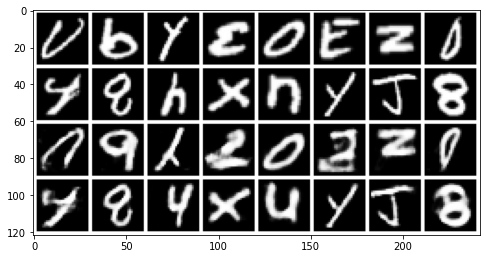

In [7]:
batch, out, latent, noise = utils.load_results("./out/reconstructions/vae/EMNIST_dpr")
new_out = utils.pick_results(batch, out)
for i in range(new_out.shape[1]):
    print("PSNR: {:.4f} +/- {:.4f}\nSSIM: {:.4f} +/- {:.4f}\nLPIPS: {:.4f} +/- {:.4f}\n".format(
        *evaluater.benchmark(batch, new_out[:,i], measure='psnr', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='ssim', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='lpips', reg=True)
    ))
utils.plot_grid(np.vstack([batch[:16], new_out[:16, -1]]), figsize=(8,8))

In [ ]:
config = {'arch': 'vae',
          'device': device,
          'meas_fn': utils.torch_magnitudes,
          'dist_fn': lambda X, Y: torch.mean((X - Y)**2 , dim=(1,2,3)),
          'start_layer': 0, 'end_layer': 2,
          'latent_size': (100,),
          'lr': [0.1, 0.1, 0.1], 'lr_rampdown': 0., 'lr_rampup': 0., 'lr_global': False,
          'im_steps': [(3000,0,1)],
          'mahalanobis': False,
          'pgd': False,
          'keep_im' : True,
          'random_init': 0,
          }
file = "./out/reconstructions/vae/EMNIST_dpr-mii"
_, _, latent, noise = utils.load_results("./out/reconstructions/vae/EMNIST_mii")

batch, out, latent, noise = optimizer.run(dec, config, dataloader['test'], imsize, n_samples=n_samples, bs=batch_size, restarts=restarts, z_init=latent, noise_init=noise, file=file)

new_out = utils.pick_results(batch, out)
for i in range(new_out.shape[1]):
    print("PSNR: {:.4f} +/- {:.4f}\nSSIM: {:.4f} +/- {:.4f}\nLPIPS: {:.4f} +/- {:.4f}\n".format(
        *evaluater.benchmark(batch, new_out[:,i], measure='psnr', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='ssim', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='lpips', reg=True)
    ))
utils.plot_grid(np.vstack([batch[:16], new_out[:16, -1]]), figsize=(8,8))

PSNR: 19.7688 +/- 0.3429
SSIM: 0.8188 +/- 0.0110
LPIPS: 0.1433 +/- 0.0064

PSNR: 21.5029 +/- 0.3106
SSIM: 0.8742 +/- 0.0090
LPIPS: 0.1130 +/- 0.0052

PSNR: 22.1857 +/- 0.2838
SSIM: 0.8964 +/- 0.0075
LPIPS: 0.1009 +/- 0.0045

PSNR: 22.5576 +/- 0.2775
SSIM: 0.9059 +/- 0.0068
LPIPS: 0.0950 +/- 0.0041



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


PSNR: 22.7837 +/- 0.2728
SSIM: 0.9113 +/- 0.0064
LPIPS: 0.0914 +/- 0.0039



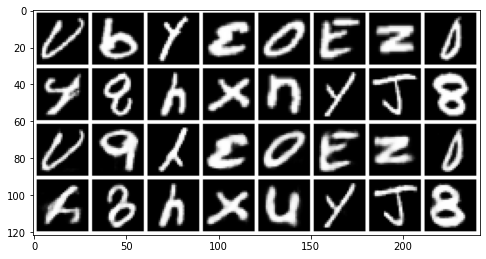

In [8]:
batch, out, latent, noise = utils.load_results("./out/reconstructions/vae/EMNIST_dpr-mii")
new_out = utils.pick_results(batch, out)
for i in range(new_out.shape[1]):
    print("PSNR: {:.4f} +/- {:.4f}\nSSIM: {:.4f} +/- {:.4f}\nLPIPS: {:.4f} +/- {:.4f}\n".format(
        *evaluater.benchmark(batch, new_out[:,i], measure='psnr', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='ssim', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='lpips', reg=True)
    ))
utils.plot_grid(np.vstack([batch[:16], new_out[:16, -1]]), figsize=(8,8))

In [ ]:
config = {'arch': 'vae',
          'device': device,
          'meas_fn': utils.torch_magnitudes,
          'dist_fn': lambda X, Y: torch.mean((X - Y)**2 , dim=(1,2,3)),
          'start_layer': 0, 'end_layer': 2,
          'latent_size': (100,),
          'lr': [0.1, 0.1, 0.1], 'lr_rampdown': 0., 'lr_rampup': 0., 'lr_global': False,
          'im_steps': [(150,100,1), (150,50,1), (300,100,9)],
          'mahalanobis': False,
          'pgd': True,
          'keep_im' : True,
          'random_init': 1,
          'negate': True,
          }
file = "./out/reconstructions/vae/EMNIST_prilo"
latent, noise = None, None

batch, out, latent, noise = optimizer.run(dec, config, dataloader['test'], imsize, n_samples=n_samples, bs=batch_size, restarts=restarts, z_init=latent, noise_init=noise, file=file)

new_out = utils.pick_results(batch, out)
for i in range(new_out.shape[1]):
    print("PSNR: {:.4f} +/- {:.4f}\nSSIM: {:.4f} +/- {:.4f}\nLPIPS: {:.4f} +/- {:.4f}\n".format(
        *evaluater.benchmark(batch, new_out[:,i], measure='psnr', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='ssim', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='lpips', reg=True)
    ))
utils.plot_grid(np.vstack([batch[:16], new_out[:16, -1]]), figsize=(8,8))

PSNR: 23.7195 +/- 0.7588
SSIM: 0.7668 +/- 0.0150
LPIPS: 0.1678 +/- 0.0102

PSNR: 28.0603 +/- 0.7479
SSIM: 0.8515 +/- 0.0131
LPIPS: 0.1102 +/- 0.0091

PSNR: 30.8201 +/- 0.7193
SSIM: 0.8939 +/- 0.0116
LPIPS: 0.0804 +/- 0.0080

PSNR: 32.8247 +/- 0.6673
SSIM: 0.9257 +/- 0.0098
LPIPS: 0.0584 +/- 0.0068



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


PSNR: 33.8263 +/- 0.6440
SSIM: 0.9367 +/- 0.0091
LPIPS: 0.0498 +/- 0.0063



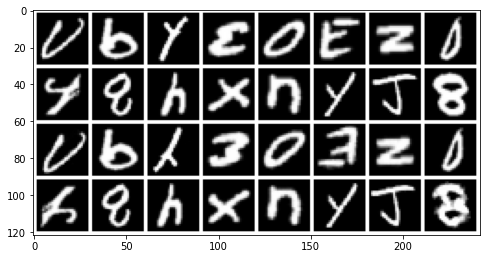

In [9]:
batch, out, latent, noise = utils.load_results("./out/reconstructions/vae/EMNIST_prilo")
new_out = utils.pick_results(batch, out)
for i in range(new_out.shape[1]):
    print("PSNR: {:.4f} +/- {:.4f}\nSSIM: {:.4f} +/- {:.4f}\nLPIPS: {:.4f} +/- {:.4f}\n".format(
        *evaluater.benchmark(batch, new_out[:,i], measure='psnr', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='ssim', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='lpips', reg=True)
    ))
utils.plot_grid(np.vstack([batch[:16], new_out[:16, -1]]), figsize=(8,8))

In [ ]:
config = {'arch': 'vae',
          'device': device,
          'meas_fn': utils.torch_magnitudes,
          'dist_fn': lambda X, Y: torch.mean((X - Y)**2 , dim=(1,2,3)),
          'start_layer': 0, 'end_layer': 2,
          'latent_size': (100,),
          'lr': [0.1, 0.1, 0.1], 'lr_rampdown': 0., 'lr_rampup': 0., 'lr_global': False,
          'im_steps': [(150,100,1), (150,50,1), (300,100,9)],
          'mahalanobis': False,
          'pgd': True,
          'keep_im' : True,
          'random_init': 0,
          }
file = "./out/reconstructions/vae/EMNIST_prilo-mii"
_, _, latent, noise = utils.load_results("./out/reconstructions/vae/EMNIST-mii")

batch, out, latent, noise = optimizer.run(dec, config, dataloader['test'], imsize, n_samples=n_samples, bs=batch_size, restarts=restarts, z_init=latent, noise_init=noise, file=file)

new_out = utils.pick_results(batch, out)
for i in range(new_out.shape[1]):
    print("PSNR: {:.4f} +/- {:.4f}\nSSIM: {:.4f} +/- {:.4f}\nLPIPS: {:.4f} +/- {:.4f}\n".format(
        *evaluater.benchmark(batch, new_out[:,i], measure='psnr', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='ssim', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='lpips', reg=True)
    ))
utils.plot_grid(np.vstack([batch[:16], new_out[:16, -1]]), figsize=(8,8))

PSNR: 29.1655 +/- 0.7219
SSIM: 0.8794 +/- 0.0117
LPIPS: 0.0884 +/- 0.0078

PSNR: 33.3885 +/- 0.6520
SSIM: 0.9331 +/- 0.0092
LPIPS: 0.0512 +/- 0.0063

PSNR: 35.4228 +/- 0.5892
SSIM: 0.9564 +/- 0.0074
LPIPS: 0.0346 +/- 0.0050

PSNR: 36.6148 +/- 0.5469
SSIM: 0.9671 +/- 0.0064
LPIPS: 0.0271 +/- 0.0044



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


PSNR: 37.1807 +/- 0.5257
SSIM: 0.9719 +/- 0.0060
LPIPS: 0.0233 +/- 0.0040



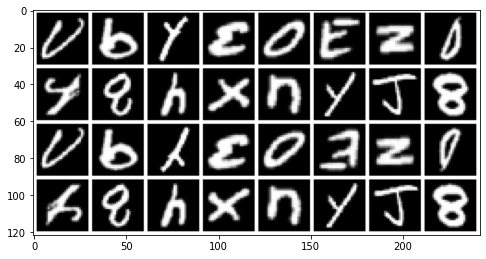

In [10]:
batch, out, latent, noise = utils.load_results("./out/reconstructions/vae/EMNIST_prilo-mii")
new_out = utils.pick_results(batch, out)
for i in range(new_out.shape[1]):
    print("PSNR: {:.4f} +/- {:.4f}\nSSIM: {:.4f} +/- {:.4f}\nLPIPS: {:.4f} +/- {:.4f}\n".format(
        *evaluater.benchmark(batch, new_out[:,i], measure='psnr', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='ssim', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='lpips', reg=True)
    ))
utils.plot_grid(np.vstack([batch[:16], new_out[:16, -1]]), figsize=(8,8))

# Fashion-MNIST

In [ ]:
n_samples = 1024
batch_size = 1024
restarts = 5

device = torch.device('cuda')
dataloader, imsize = data.load(name='Fashion', path='./data', batch_size=batch_size)
dec = vae.model.Decoder()
dec.load_state_dict(torch.load("./out/models/vae_dec_fashion.sd"))
dec = nn.DataParallel(dec, device_ids=[0])

In [ ]:
config = {'arch': 'vae',
          'device': device,
          'meas_fn': utils.torch_magnitudes,
          'dist_fn': lambda X, Y: torch.mean((X - Y)**2 , dim=(1,2,3)),
          'start_layer': 0, 'end_layer': 2,
          'latent_size': (100,),
          'lr': [0.1, 0.1, 0.1], 'lr_rampdown': 0., 'lr_rampup': 0., 'lr_global': False,
          'im_steps': [],
          'random_init': 5000,
          }
file = "./out/reconstructions/vae/Fashion_mii"
latent, noise = None, None

batch, out, latent, noise = optimizer.run(dec, config, dataloader['test'], imsize, n_samples=n_samples, bs=batch_size, restarts=restarts, z_init=latent, noise_init=noise, file=file)

new_out = utils.pick_results(batch, out)
for i in range(new_out.shape[1]):
    print("PSNR: {:.4f} +/- {:.4f}\nSSIM: {:.4f} +/- {:.4f}\nLPIPS: {:.4f} +/- {:.4f}\n".format(
        *evaluater.benchmark(batch, new_out[:,i], measure='psnr', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='ssim', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='lpips', reg=True)
    ))
utils.plot_grid(np.vstack([batch[:16], new_out[:16, -1]]), figsize=(8,8))

In [ ]:
config = {'arch': 'vae',
          'device': device,
          'meas_fn': utils.torch_magnitudes,
          'dist_fn': lambda X, Y: torch.mean((X - Y)**2 , dim=(1,2,3)),
          'start_layer': 0, 'end_layer': 2,
          'latent_size': (100,),
          'lr': [0.1, 0.1, 0.1], 'lr_rampdown': 0., 'lr_rampup': 0., 'lr_global': False,
          'im_steps': [(3000,0,1)],
          'mahalanobis': False,
          'pgd': False,
          'keep_im' : True,
          'random_init': 1,
          'negate': True,
          }
file = "./out/reconstructions/vae/Fashion_dpr"
file = None
latent, noise = None, None

batch, out, latent, noise = optimizer.run(dec, config, dataloader['test'], imsize, n_samples=n_samples, bs=batch_size, restarts=restarts, z_init=latent, noise_init=noise, file=file)

new_out = utils.pick_results(batch, out)
for i in range(new_out.shape[1]):
    print("PSNR: {:.4f} +/- {:.4f}\nSSIM: {:.4f} +/- {:.4f}\nLPIPS: {:.4f} +/- {:.4f}\n".format(
        *evaluater.benchmark(batch, new_out[:,i], measure='psnr', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='ssim', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='lpips', reg=True)
    ))
utils.plot_grid(np.vstack([batch[:16], new_out[:16, -1]]), figsize=(8,8))

PSNR: 16.0284 +/- 0.2423
SSIM: 0.5503 +/- 0.0125
LPIPS: 0.3245 +/- 0.0072

PSNR: 17.4153 +/- 0.2483
SSIM: 0.6195 +/- 0.0123
LPIPS: 0.2824 +/- 0.0070

PSNR: 18.2122 +/- 0.2468
SSIM: 0.6556 +/- 0.0117
LPIPS: 0.2592 +/- 0.0067

PSNR: 18.6825 +/- 0.2438
SSIM: 0.6762 +/- 0.0115
LPIPS: 0.2459 +/- 0.0064



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


PSNR: 18.8657 +/- 0.2434
SSIM: 0.6846 +/- 0.0113
LPIPS: 0.2405 +/- 0.0062



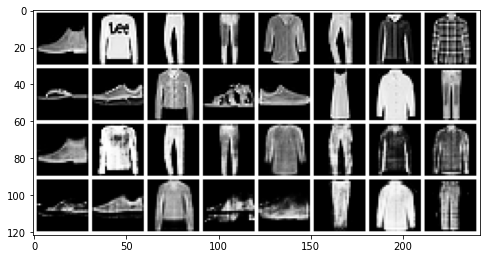

In [11]:
batch, out, latent, noise = utils.load_results("./out/reconstructions/vae/Fashion_dpr")
new_out = utils.pick_results(batch, out)
for i in range(new_out.shape[1]):
    print("PSNR: {:.4f} +/- {:.4f}\nSSIM: {:.4f} +/- {:.4f}\nLPIPS: {:.4f} +/- {:.4f}\n".format(
        *evaluater.benchmark(batch, new_out[:,i], measure='psnr', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='ssim', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='lpips', reg=True)
    ))
utils.plot_grid(np.vstack([batch[:16], new_out[:16, -1]]), figsize=(8,8))

In [ ]:
config = {'arch': 'vae',
          'device': device,
          'meas_fn': utils.torch_magnitudes,
          'dist_fn': lambda X, Y: torch.mean((X - Y)**2 , dim=(1,2,3)),
          'start_layer': 0, 'end_layer': 2,
          'latent_size': (100,),
          'lr': [0.1, 0.1, 0.1], 'lr_rampdown': 0., 'lr_rampup': 0., 'lr_global': False,
          'im_steps': [(3000,0,1)],
          'mahalanobis': False,
          'pgd': False,
          'keep_im' : True,
          'random_init': 0,
          }
file = "./out/reconstructions/vae/Fashion_dpr-mii"
_, _, latent, noise = utils.load_results("./out/reconstructions/vae/Fashion_mii")

batch, out, latent, noise = optimizer.run(dec, config, dataloader['test'], imsize, n_samples=n_samples, bs=batch_size, restarts=restarts, z_init=latent, noise_init=noise, file=file)

new_out = utils.pick_results(batch, out)
for i in range(new_out.shape[1]):
    print("PSNR: {:.4f} +/- {:.4f}\nSSIM: {:.4f} +/- {:.4f}\nLPIPS: {:.4f} +/- {:.4f}\n".format(
        *evaluater.benchmark(batch, new_out[:,i], measure='psnr', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='ssim', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='lpips', reg=True)
    ))
utils.plot_grid(np.vstack([batch[:16], new_out[:16, -1]]), figsize=(8,8))

PSNR: 17.2809 +/- 0.1539
SSIM: 0.6392 +/- 0.0099
LPIPS: 0.2783 +/- 0.0060

PSNR: 17.4834 +/- 0.1546
SSIM: 0.6479 +/- 0.0098
LPIPS: 0.2733 +/- 0.0059

PSNR: 17.5977 +/- 0.1573
SSIM: 0.6530 +/- 0.0099
LPIPS: 0.2708 +/- 0.0059

PSNR: 17.6863 +/- 0.1583
SSIM: 0.6559 +/- 0.0099
LPIPS: 0.2701 +/- 0.0060



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


PSNR: 17.7705 +/- 0.1607
SSIM: 0.6589 +/- 0.0100
LPIPS: 0.2678 +/- 0.0060



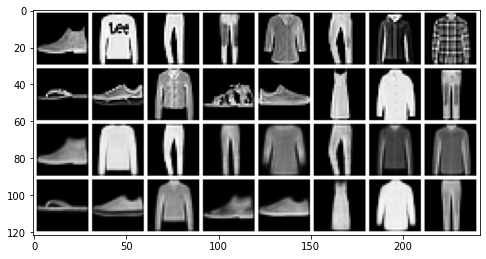

In [12]:
batch, out, latent, noise = utils.load_results("./out/reconstructions/vae/Fashion_dpr-mii")
new_out = utils.pick_results(batch, out)
for i in range(new_out.shape[1]):
    print("PSNR: {:.4f} +/- {:.4f}\nSSIM: {:.4f} +/- {:.4f}\nLPIPS: {:.4f} +/- {:.4f}\n".format(
        *evaluater.benchmark(batch, new_out[:,i], measure='psnr', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='ssim', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='lpips', reg=True)
    ))
utils.plot_grid(np.vstack([batch[:16], new_out[:16, -1]]), figsize=(8,8))

In [ ]:
config = {'arch': 'vae',
          'device': device,
          'meas_fn': utils.torch_magnitudes,
          'dist_fn': lambda X, Y: torch.mean((X - Y)**2 , dim=(1,2,3)),
          'start_layer': 0, 'end_layer': 2,
          'latent_size': (100,),
          'lr': [0.1, 0.1, 0.1], 'lr_rampdown': 0., 'lr_rampup': 0., 'lr_global': False,
          'im_steps': [(100,100,1), (100,10,1), (200,40,4)],
          'mahalanobis': False,
          'pgd': True,
          'keep_im' : True,
          'random_init': 1,
          'negate': True,
          }
file = "./out/reconstructions/vae/Fashion_prilo"
latent, noise = None, None

batch, out, latent, noise = optimizer.run(dec, config, dataloader['test'], imsize, n_samples=n_samples, bs=batch_size, restarts=restarts, z_init=latent, noise_init=noise, file=file)

new_out = utils.pick_results(batch, out)
for i in range(new_out.shape[1]):
    print("PSNR: {:.4f} +/- {:.4f}\nSSIM: {:.4f} +/- {:.4f}\nLPIPS: {:.4f} +/- {:.4f}\n".format(
        *evaluater.benchmark(batch, new_out[:,i], measure='psnr', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='ssim', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='lpips', reg=True)
    ))
utils.plot_grid(np.vstack([batch[:16], new_out[:16, -1]]), figsize=(8,8))

In [13]:
batch, out, latent, noise = utils.load_results("./out/reconstructions/vae/Fashion_prilo")
new_out = utils.pick_results(batch, out)
for i in range(new_out.shape[1]):
    print("PSNR: {:.4f} +/- {:.4f}\nSSIM: {:.4f} +/- {:.4f}\nLPIPS: {:.4f} +/- {:.4f}\n".format(
        *evaluater.benchmark(batch, new_out[:,i], measure='psnr', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='ssim', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='lpips', reg=True)
    ))
utils.plot_grid(np.vstack([batch[:16], new_out[:16, -1]]), figsize=(8,8))

PSNR: 16.7843 +/- 0.2820
SSIM: 0.5803 +/- 0.0125
LPIPS: 0.3216 +/- 0.0074

PSNR: 18.2853 +/- 0.3118
SSIM: 0.6431 +/- 0.0127
LPIPS: 0.2813 +/- 0.0075

PSNR: 19.2222 +/- 0.3254
SSIM: 0.6773 +/- 0.0124
LPIPS: 0.2585 +/- 0.0074

PSNR: 19.8846 +/- 0.3286
SSIM: 0.7026 +/- 0.0121
LPIPS: 0.2418 +/- 0.0072



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


PSNR: 20.2087 +/- 0.3300
SSIM: 0.7133 +/- 0.0120
LPIPS: 0.2342 +/- 0.0070



In [ ]:
config = {'arch': 'vae',
          'device': device,
          'meas_fn': utils.torch_magnitudes,
          'dist_fn': lambda X, Y: torch.mean((X - Y)**2 , dim=(1,2,3)),
          'start_layer': 0, 'end_layer': 2,
          'latent_size': (100,),
          'lr': [0.1, 0.1, 0.1], 'lr_rampdown': 0., 'lr_rampup': 0., 'lr_global': False,
          'im_steps': [(100,100,1), (100,10,1), (200,40,4)],
          'mahalanobis': False,
          'pgd': True,
          'keep_im' : True,
          'random_init': 0,
          }
file = "./out/reconstructions/vae/Fashion_prilo-mii"
_, _, latent, noise = utils.load_results("./out/reconstructions/vae/Fashion_mii")

batch, out, latent, noise = optimizer.run(dec, config, dataloader['test'], imsize, n_samples=n_samples, bs=batch_size, restarts=restarts, z_init=latent, noise_init=noise, file=file)

new_out = utils.pick_results(batch, out)
for i in range(new_out.shape[1]):
    print("PSNR: {:.4f} +/- {:.4f}\nSSIM: {:.4f} +/- {:.4f}\nLPIPS: {:.4f} +/- {:.4f}\n".format(
        *evaluater.benchmark(batch, new_out[:,i], measure='psnr', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='ssim', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='lpips', reg=True)
    ))
utils.plot_grid(np.vstack([batch[:16], new_out[:16, -1]]), figsize=(8,8))

PSNR: 20.5679 +/- 0.3258
SSIM: 0.7298 +/- 0.0114
LPIPS: 0.2209 +/- 0.0065

PSNR: 21.1164 +/- 0.3327
SSIM: 0.7449 +/- 0.0111
LPIPS: 0.2112 +/- 0.0063

PSNR: 21.2328 +/- 0.3333
SSIM: 0.7491 +/- 0.0111
LPIPS: 0.2088 +/- 0.0063

PSNR: 21.3697 +/- 0.3349
SSIM: 0.7530 +/- 0.0110
LPIPS: 0.2071 +/- 0.0063



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


PSNR: 21.4836 +/- 0.3364
SSIM: 0.7560 +/- 0.0111
LPIPS: 0.2056 +/- 0.0063



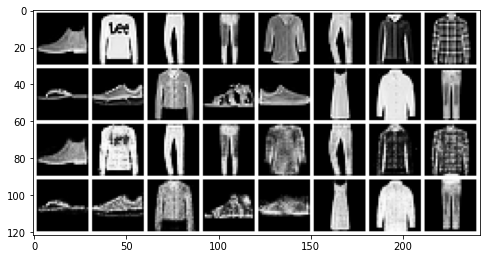

In [14]:
batch, out, latent, noise = utils.load_results("./out/reconstructions/vae/Fashion_prilo-mii")
new_out = utils.pick_results(batch, out)
for i in range(new_out.shape[1]):
    print("PSNR: {:.4f} +/- {:.4f}\nSSIM: {:.4f} +/- {:.4f}\nLPIPS: {:.4f} +/- {:.4f}\n".format(
        *evaluater.benchmark(batch, new_out[:,i], measure='psnr', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='ssim', reg=True), 
        *evaluater.benchmark(batch, new_out[:,i], measure='lpips', reg=True)
    ))
utils.plot_grid(np.vstack([batch[:16], new_out[:16, -1]]), figsize=(8,8))